In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

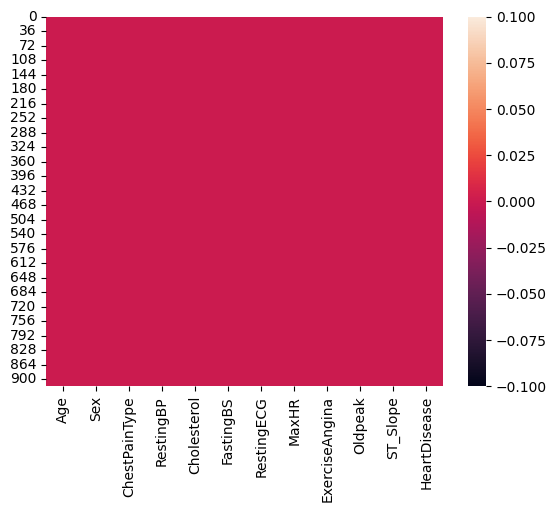

In [7]:
sns.heatmap(df.isna())

In [8]:
df.duplicated().sum()

np.int64(0)

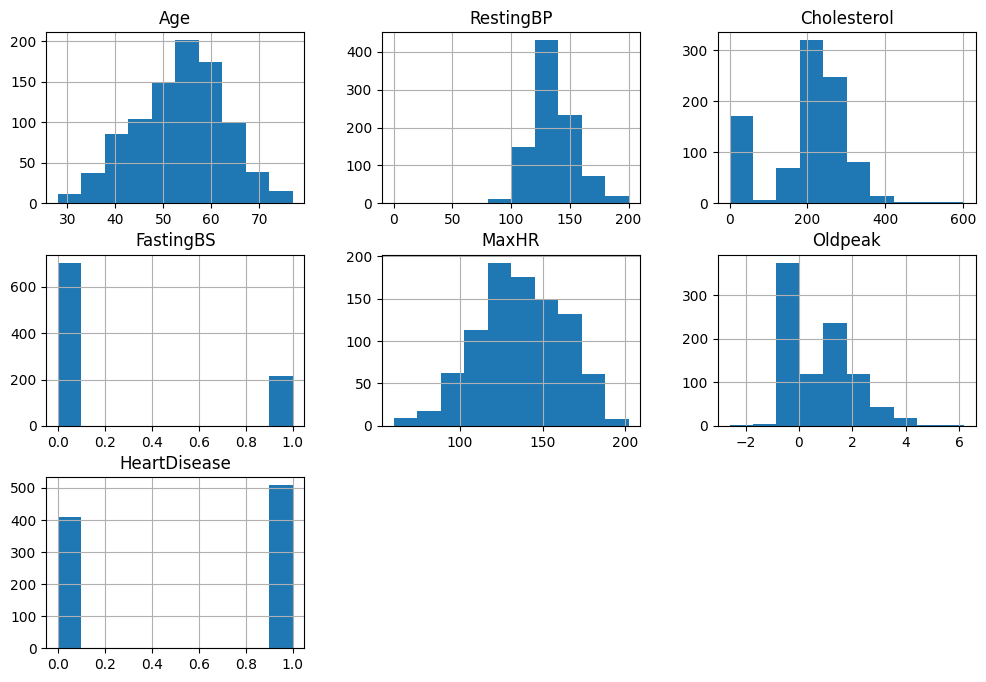

In [9]:
df.hist(figsize=(12,8))
plt.show()

In [10]:
cor = df.select_dtypes(include='number').corr()

<Axes: >

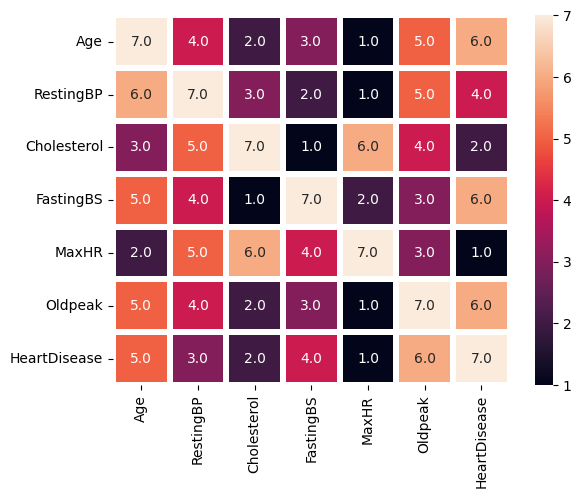

In [11]:
sns.heatmap(cor.rank(axis=1),annot=True,fmt='.1f',linewidths=3)

In [12]:
def barplot_dr (x,y,hue_):
    
    ax = sns.barplot(x=x,y=y,hue=hue_,data=df,ci=False)
    for bars in ax.containers: 
        ax.bar_label(bars)
def count_plot(x,hue_):
    ax = sns.countplot(x=x,hue=hue_,data=df)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

In [14]:
df['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64

In [15]:
print(df['Age'].min()) 
print(df['Age'].max())

28
77


In [16]:
df.groupby(['Age'],as_index=False)[['Sex']].count()

,Age,Sex
0,28,1
1,29,3
2,30,1
3,31,2
4,32,5
5,33,2
6,34,7
7,35,11
8,36,6
9,37,11


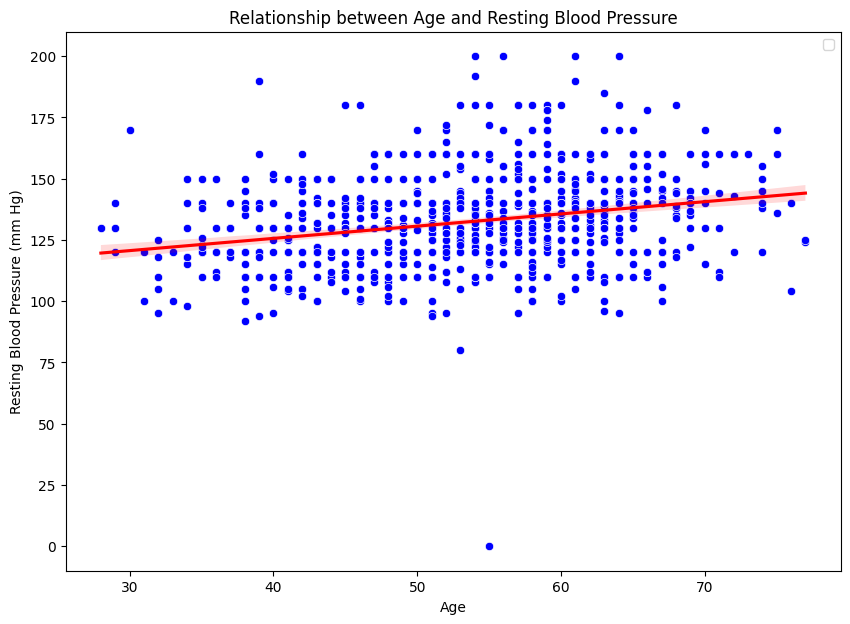

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df['Age'],y=df['RestingBP'],color='b')
sns.regplot(x = df['Age'],y=df['RestingBP'],color='r',scatter=False)
plt.title('Relationship between Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.legend()
plt.show()

In [18]:
sex_value =  df['Sex'].value_counts()

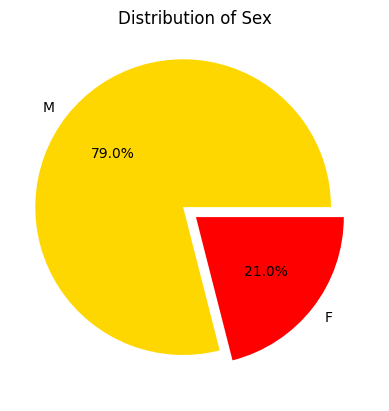

In [19]:
plt.pie(sex_value,labels=sex_value.index,autopct='%1.1f%%',colors=['gold','r'],explode=[.1,.01])
plt.title('Distribution of Sex')



plt.show()

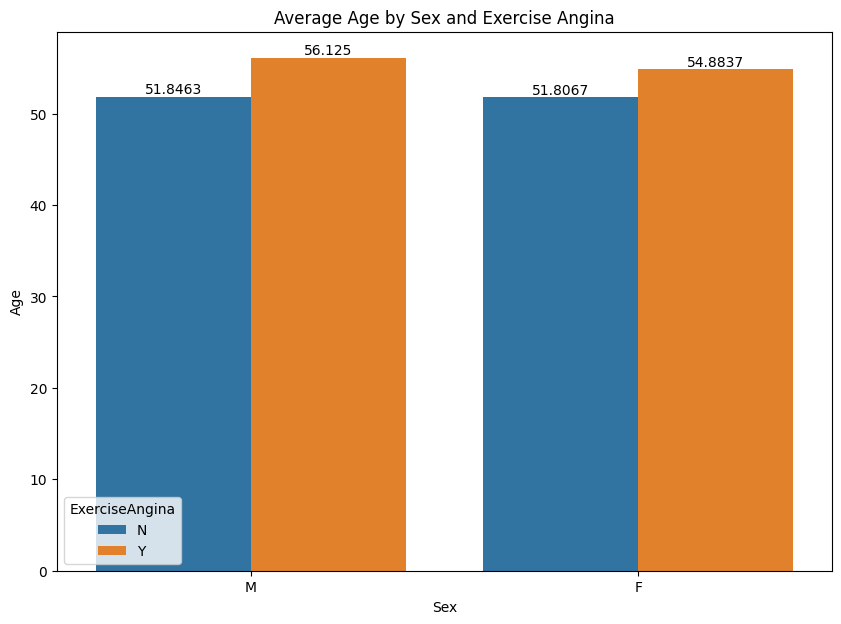

In [20]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x='Sex',y=df['Age'],hue='ExerciseAngina',data=df,ci=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Age by Sex and Exercise Angina')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [21]:
pd.crosstab(df['Sex'], df['HeartDisease'], margins=True)

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


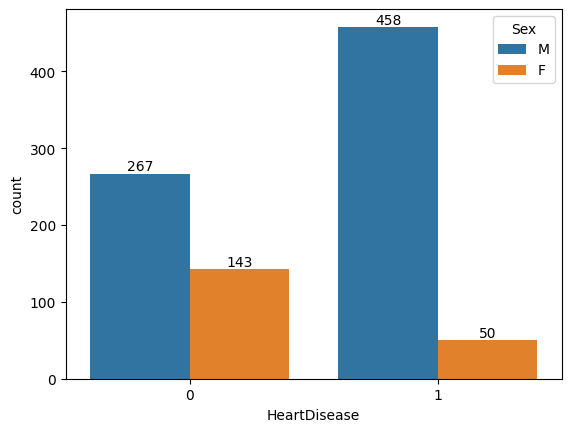

In [22]:
count_plot('HeartDisease','Sex')

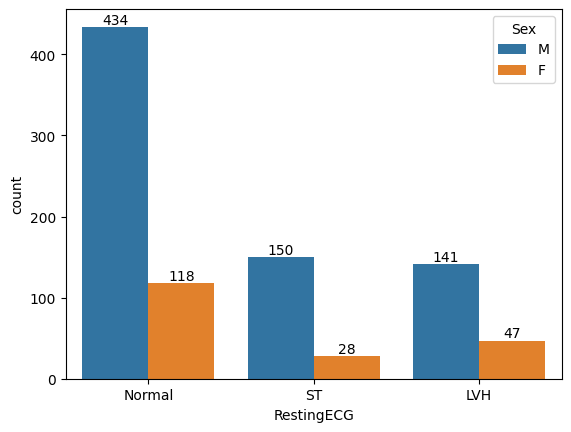

In [23]:
def count_plot(x,hue_):
    ax = sns.countplot(x=x,hue=hue_,data=df)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()
count_plot('RestingECG','Sex')

In [24]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [25]:
ChestPainType_count =df['ChestPainType'].value_counts()

In [26]:
def barplot_count(x,y):
    ax = sns.barplot(x=x,y=y,palette='rocket')
    for bars in ax.containers: 
        ax.bar_label(bars)

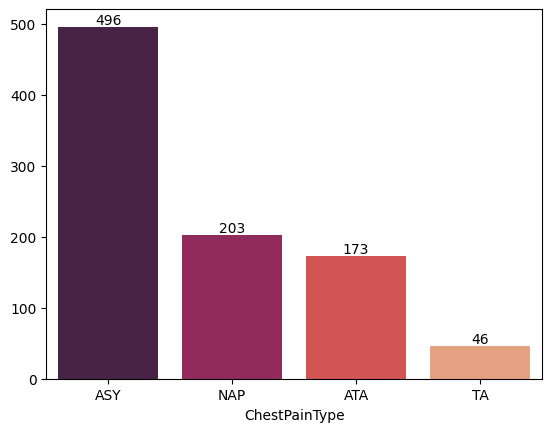

In [27]:
barplot_count(ChestPainType_count.index,ChestPainType_count.values)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lable = LabelEncoder()

In [31]:
obje = df.select_dtypes(include='object')
non_obje = df.select_dtypes(exclude='object')

In [32]:
for i in range(0,obje.shape[1]):
    obje.iloc[:,i] = lable.fit_transform(obje.iloc[:,i])

In [33]:
df = pd.concat([obje,non_obje],axis=1)

In [34]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
input_ = df.drop(['HeartDisease'],axis=1)
target = df['HeartDisease']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(input_,target,test_size=0.2)

In [38]:
def all (model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    print(confusion_matrix(pre,y_test))
    print(classification_report(pre,y_test))

In [39]:
model1 = GaussianNB()
all(model1)

[[73 14]
 [13 84]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        87
           1       0.86      0.87      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [40]:
model2 = KNeighborsClassifier()
all(model2)

[[53 21]
 [33 77]]
              precision    recall  f1-score   support

           0       0.62      0.72      0.66        74
           1       0.79      0.70      0.74       110

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.72      0.71      0.71       184



In [41]:
model3 = RandomForestClassifier()
all(model3)

[[69  8]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        77
           1       0.92      0.84      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [42]:
model4 = SVC()
all(model4)

[[55 27]
 [31 71]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        82
           1       0.72      0.70      0.71       102

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.68      0.69       184



In [43]:
model5 = DecisionTreeClassifier()
all(model5)

[[69 20]
 [17 78]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        89
           1       0.80      0.82      0.81        95

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



In [44]:
model6 = GradientBoostingClassifier()
all(model6)

[[72  6]
 [14 92]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        78
           1       0.94      0.87      0.90       106

    accuracy                           0.89       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.89      0.89       184

